### Data Visualisation

In [131]:
import seaborn as sns
import matplotlib.pyplot as plt

import numpy as np
import pandas as pd

data = pd.read_csv('london-borough-profiles-jan2018.csv', encoding='latin1')
data

,Code,New code,Area name,Inner/ Outer London,GLA Population Estimate 2017,GLA Household Estimate 2017,Inland Area (Hectares),Population density (per hectare) 2017,"Average Age, 2017","Proportion of population aged 0-15, 2015",...,Happiness score 2011-14 (out of 10),Anxiety score 2011-14 (out of 10),Childhood Obesity Prevalance (%) 2015/16,People aged 17+ with diabetes (%),Mortality rate from causes considered preventable 2012/14,Political control in council,Proportion of seats won by Conservatives in 2014 election,Proportion of seats won by Labour in 2014 election,Proportion of seats won by Lib Dems in 2014 election,Turnout at 2014 local elections
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,E09000001,E09000001,City of London,Inner London,8800.0,5326.0,290,30.3,43.2,11.4,...,6.0,5.6,NaN,2.6,129.0,.,.,.,.,.
2,E09000002,E09000002,Barking and Dagenham,Outer London,209000.0,78188.0,"3,611",57.9,32.9,27.2,...,7.1,3.1,28.5,7.3,228.0,Lab,0,100,0,36.5
3,E09000003,E09000003,Barnet,Outer London,389600.0,151423.0,"8,675",44.9,37.3,21.1,...,7.4,2.8,20.7,6.0,134.0,Cons,50.8,.,1.6,40.5
4,E09000004,E09000004,Bexley,Outer London,244300.0,97736.0,"6,058",40.3,39.0,20.6,...,7.2,3.3,22.7,6.9,164.0,Cons,71.4,23.8,0,39.6
5,E09000005,E09000005,Brent,Outer London,332100.0,121048.0,"4,323",76.8,35.6,20.9,...,7.2,2.9,24.3,7.9,169.0,Lab,9.5,88.9,1.6,36.3
6,E09000006,E09000006,Bromley,Outer London,327900.0,140602.0,"15,013",21.8,40.2,19.9,...,7.4,3.3,16,5.2,148.0,Cons,85,11.7,0,40.8
7,E09000007,E09000007,Camden,Inner London,242500.0,107654.0,"2,179",111.3,36.4,17.3,...,7.1,3.6,21.3,3.9,164.0,Lab,22.2,74.1,1.9,38.7
8,E09000008,E09000008,Croydon,Outer London,386500.0,159010.0,"8,650",44.7,37.0,22.0,...,7.2,3.3,24.5,6.5,178.0,Lab,42.9,57.1,0,38.6
9,E09000009,E09000009,Ealing,Outer London,351600.0,132663.0,"5,554",63.3,36.2,21.4,...,7.3,3.6,23.8,6.9,164.0,Lab,17.4,76.8,5.8,41.2


In [132]:
features = data.columns.tolist()
for feature in features:
    print(feature)

Code
New code
Area name
Inner/ Outer London
GLA Population Estimate 2017
GLA Household Estimate 2017
Inland Area (Hectares)
Population density (per hectare) 2017
Average Age, 2017
Proportion of population aged 0-15, 2015
Proportion of population of working-age, 2015
Proportion of population aged 65 and over, 2015
Net internal migration (2015)
Net international migration (2015)
Net natural change (2015)
% of resident population born abroad (2015)
Largest migrant population by country of birth (2011)
% of largest migrant population (2011)
Second largest migrant population by country of birth (2011)
% of second largest migrant population (2011)
Third largest migrant population by country of birth (2011)
% of third largest migrant population (2011)
% of population from BAME groups (2016)
% people aged 3+ whose main language is not English (2011 Census)
Overseas nationals entering the UK (NINo), (2015/16)
New migrant (NINo) rates, (2015/16)
Largest migrant population arrived during 2015/16


/var/folders/xt/9yhd6vfj2xx9mbwp1xq8_y3h0000gn/T/ipykernel_13502/3655117179.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Population density (per hectare) 2017', y='Area name', data=pop_density_data, palette='viridis')


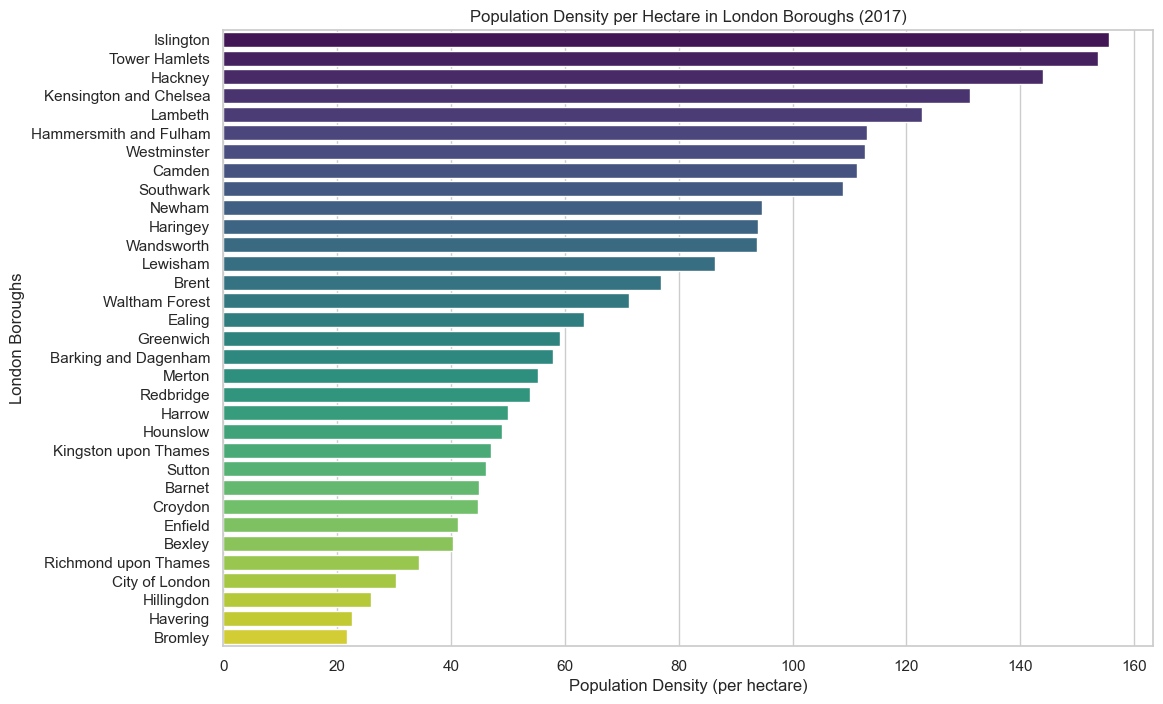

In [133]:
import seaborn as sns
import matplotlib.pyplot as plt

# Filtering relevant columns for Population Density Visualization
pop_density_data = data[['Area name', 'Population density (per hectare) 2017']].sort_values(by='Population density (per hectare) 2017', ascending=False)

# Creating a bar plot for Population Density
plt.figure(figsize=(12, 8))
sns.barplot(x='Population density (per hectare) 2017', y='Area name', data=pop_density_data, palette='viridis')
plt.title('Population Density per Hectare in London Boroughs (2017)')
plt.xlabel('Population Density (per hectare)')
plt.ylabel('London Boroughs')
plt.show()

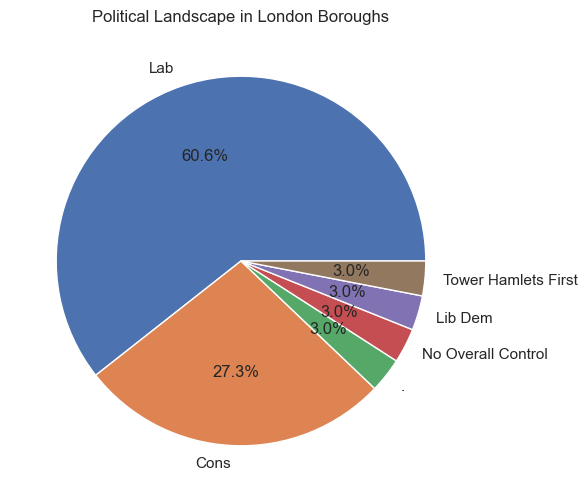

In [134]:
# Extracting the relevant data for the political landscape visualization
political_data = data['Political control in council'].value_counts().reset_index()
political_data.columns = ['Political Control', 'Count']

# Creating a pie chart for the political landscape analysis
plt.figure(figsize=(10, 6))
plt.pie(political_data['Count'], labels=political_data['Political Control'], autopct='%1.1f%%')
plt.title('Political Landscape in London Boroughs')

# Displaying the plot
plt.show()

/var/folders/xt/9yhd6vfj2xx9mbwp1xq8_y3h0000gn/T/ipykernel_13502/686853496.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(ax=axes[0], x='Average Age, 2017', y='Area name', data=age_data_sorted, palette='coolwarm')
/var/folders/xt/9yhd6vfj2xx9mbwp1xq8_y3h0000gn/T/ipykernel_13502/686853496.py:16: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(ax=axes[1], x='Proportion of population aged 0-15, 2015', y='Area name', data=age_data_sorted, palette='coolwarm')
/var/folders/xt/9yhd6vfj2xx9mbwp1xq8_y3h0000gn/T/ipykernel_13502/686853496.py:22: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend

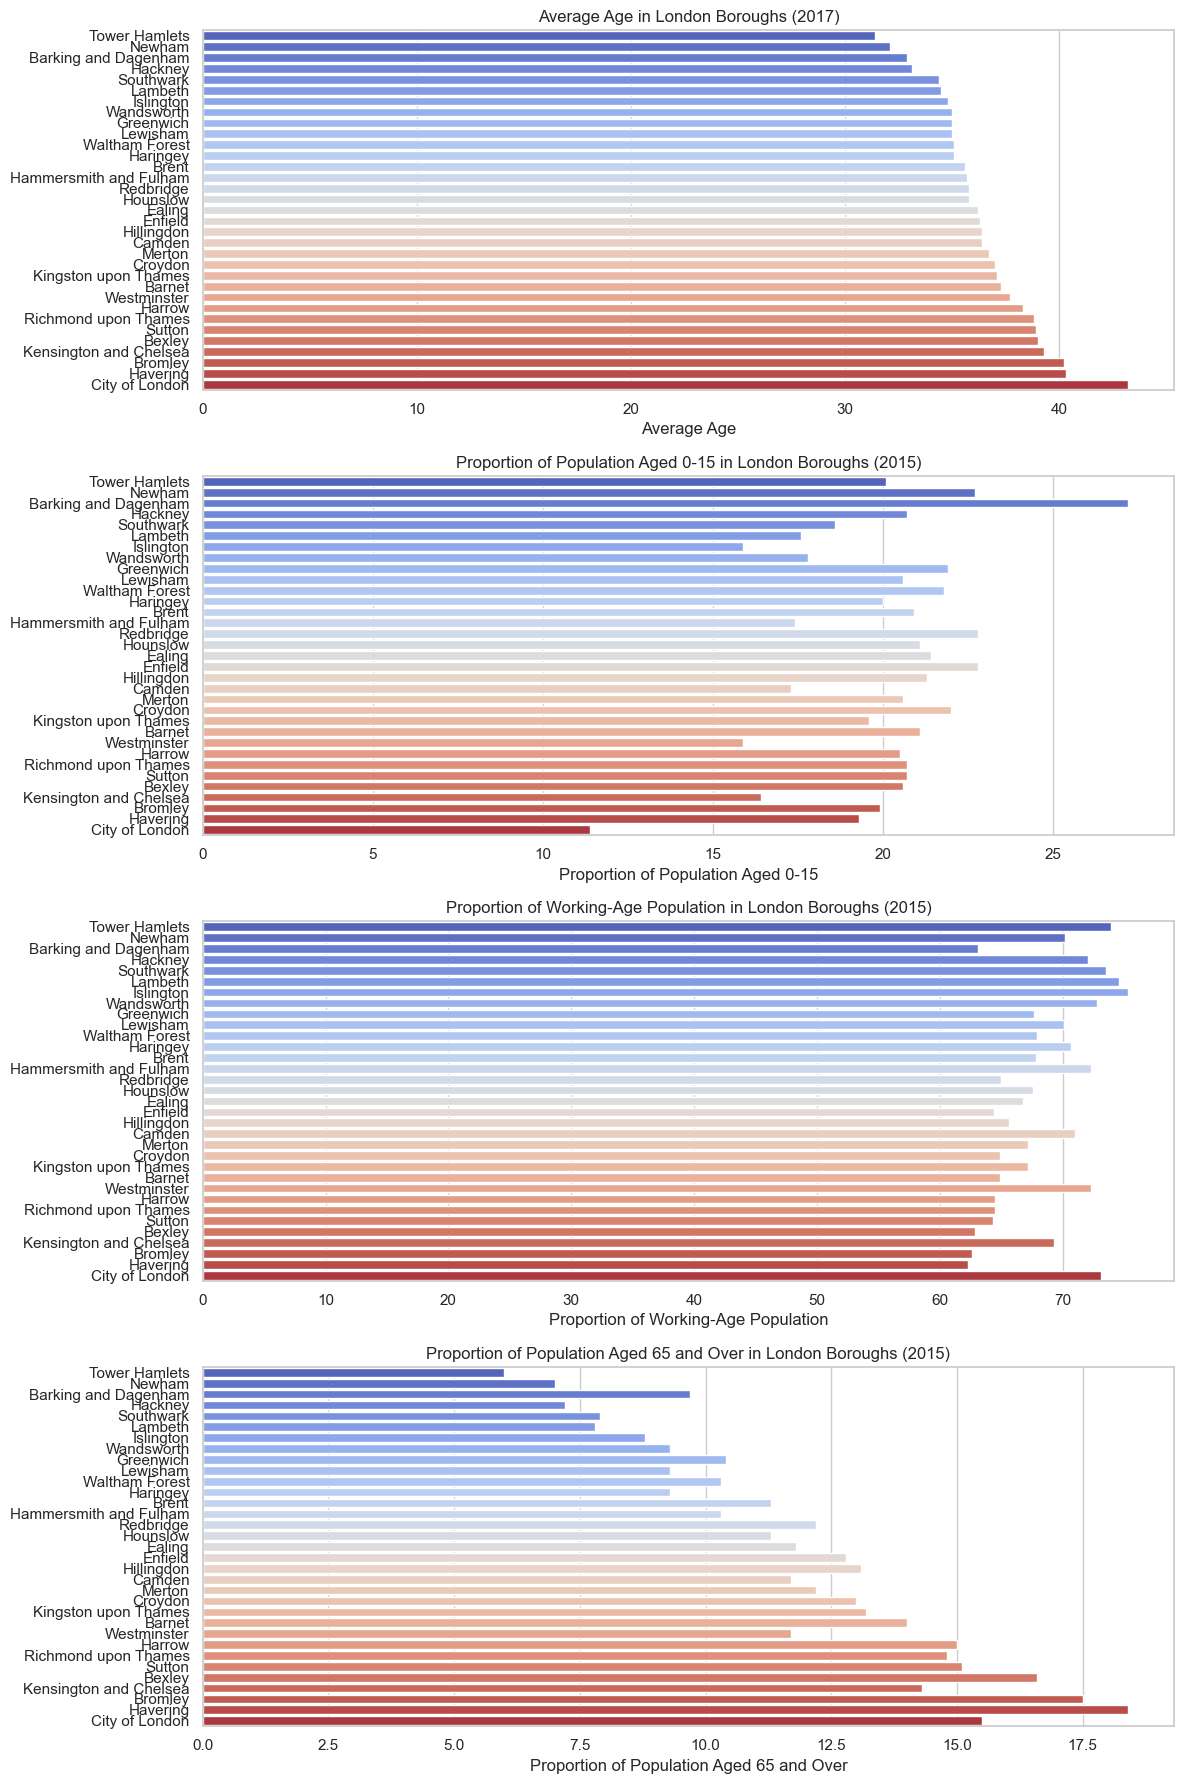

In [135]:
# Selecting relevant columns for Age Distribution Visualization
age_data = data[['Area name', 'Average Age, 2017', 'Proportion of population aged 0-15, 2015',
                        'Proportion of population of working-age, 2015', 'Proportion of population aged 65 and over, 2015']]
age_data_sorted = age_data.sort_values(by='Average Age, 2017')

# Creating bar plots for Age Distribution
fig, axes = plt.subplots(4, 1, figsize=(12, 18))

# Average Age
sns.barplot(ax=axes[0], x='Average Age, 2017', y='Area name', data=age_data_sorted, palette='coolwarm')
axes[0].set_title('Average Age in London Boroughs (2017)')
axes[0].set_xlabel('Average Age')
axes[0].set_ylabel('')

# Proportion of population aged 0-15
sns.barplot(ax=axes[1], x='Proportion of population aged 0-15, 2015', y='Area name', data=age_data_sorted, palette='coolwarm')
axes[1].set_title('Proportion of Population Aged 0-15 in London Boroughs (2015)')
axes[1].set_xlabel('Proportion of Population Aged 0-15')
axes[1].set_ylabel('')

# Proportion of population of working-age
sns.barplot(ax=axes[2], x='Proportion of population of working-age, 2015', y='Area name', data=age_data_sorted, palette='coolwarm')
axes[2].set_title('Proportion of Working-Age Population in London Boroughs (2015)')
axes[2].set_xlabel('Proportion of Working-Age Population')
axes[2].set_ylabel('')

# Proportion of population aged 65 and over
sns.barplot(ax=axes[3], x='Proportion of population aged 65 and over, 2015', y='Area name', data=age_data_sorted, palette='coolwarm')
axes[3].set_title('Proportion of Population Aged 65 and Over in London Boroughs (2015)')
axes[3].set_xlabel('Proportion of Population Aged 65 and Over')
axes[3].set_ylabel('')

plt.tight_layout()
plt.show()

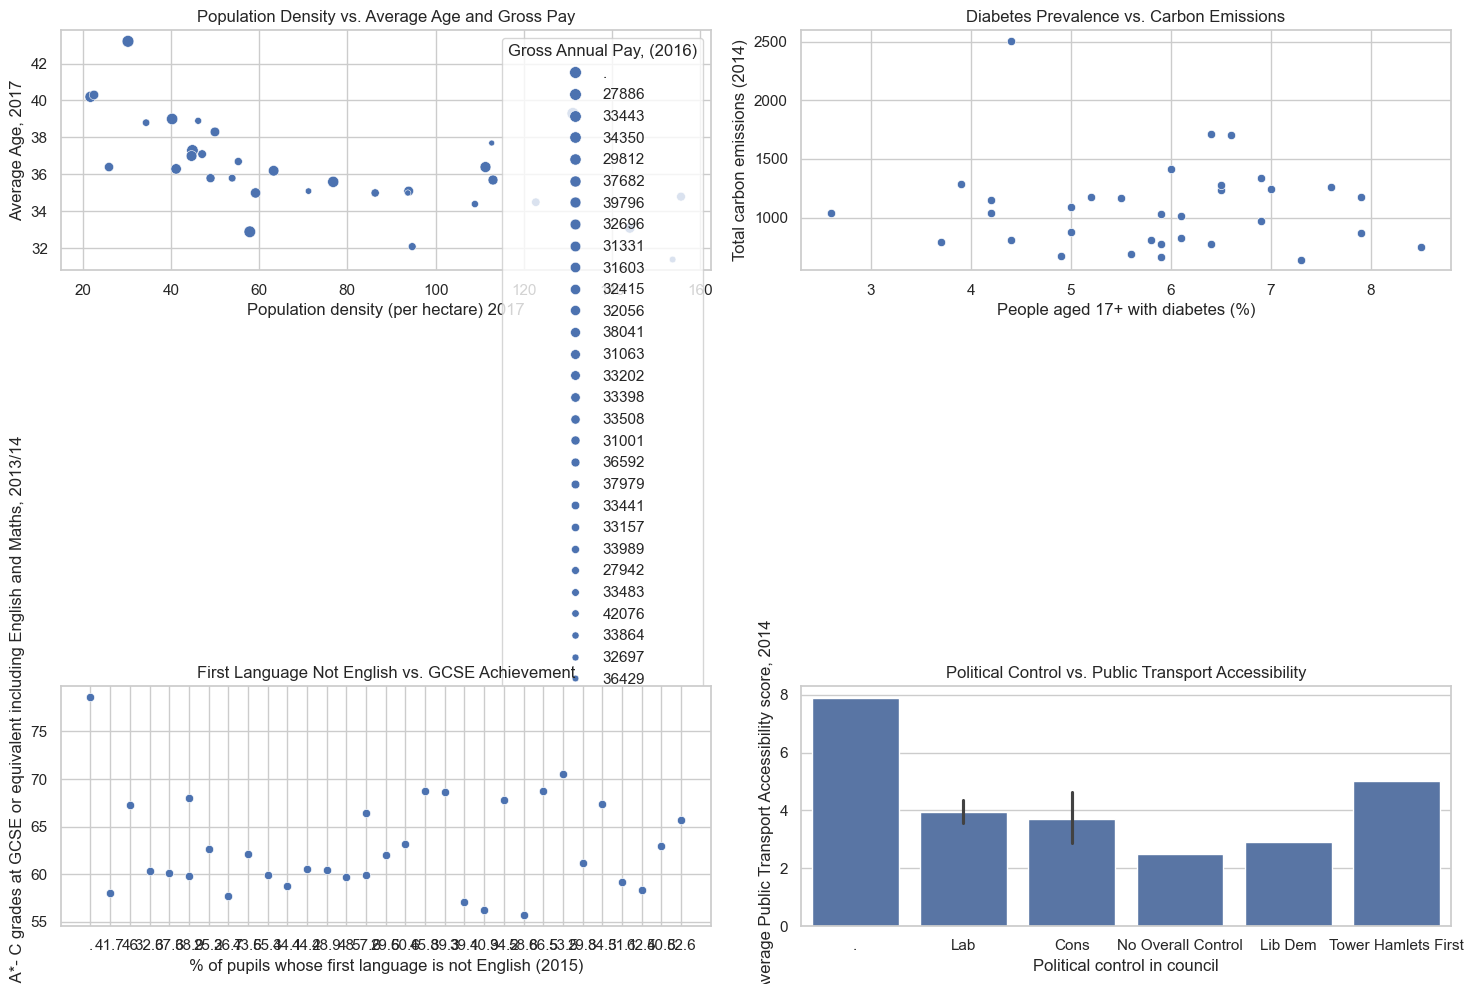

In [136]:
import seaborn as sns
import matplotlib.pyplot as plt

# Selecting a subset of features for initial visualizations
# Demographics vs. Economic Indicators
feature_set_1 = ['Population density (per hectare) 2017', 'Average Age, 2017', 'Gross Annual Pay, (2016)']

# Health and Wellbeing vs. Environmental Factors
feature_set_2 = ['People aged 17+ with diabetes (%)', 'Total carbon emissions (2014)']

# Education vs. Demographic Information
feature_set_3 = ['% of pupils whose first language is not English (2015)', 'Achievement of 5 or more A*- C grades at GCSE or equivalent including English and Maths, 2013/14']

# Political Landscape and Public Services
feature_set_4 = ['Political control in council', 'Average Public Transport Accessibility score, 2014']

# Preparing for visualization
sns.set(style="whitegrid")

# Creating a figure with multiple subplots
fig, axs = plt.subplots(2, 2, figsize=(15, 10))

# Plotting each feature set
sns.scatterplot(data=data, x=feature_set_1[0], y=feature_set_1[1], size=feature_set_1[2], ax=axs[0, 0], legend='full')
sns.scatterplot(data=data, x=feature_set_2[0], y=feature_set_2[1], ax=axs[0, 1])
sns.scatterplot(data=data, x=feature_set_3[0], y=feature_set_3[1], ax=axs[1, 0])
sns.barplot(data=data, x=feature_set_4[0], y=feature_set_4[1], ax=axs[1, 1])

# Setting titles for each subplot
axs[0, 0].set_title('Population Density vs. Average Age and Gross Pay')
axs[0, 1].set_title('Diabetes Prevalence vs. Carbon Emissions')
axs[1, 0].set_title('First Language Not English vs. GCSE Achievement')
axs[1, 1].set_title('Political Control vs. Public Transport Accessibility')

plt.tight_layout()
plt.show()


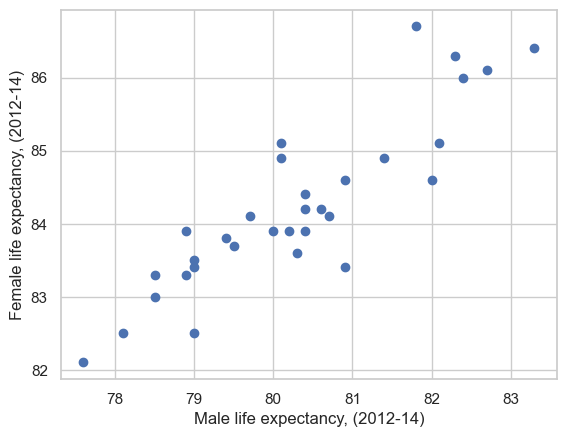

In [137]:
x = data['Male life expectancy, (2012-14)'] = pd.to_numeric(data['Male life expectancy, (2012-14)'], errors='coerce')
y = data['Female life expectancy, (2012-14)'] = pd.to_numeric(data['Female life expectancy, (2012-14)'], errors='coerce')

plt.scatter(x, y)
plt.xlabel('Male life expectancy, (2012-14)')
plt.ylabel('Female life expectancy, (2012-14)')
plt.show()

### Partitioning the Data

In [138]:
from sklearn import model_selection
from sklearn import datasets

In [139]:
print(x)

0      NaN
1      NaN
2     77.6
3     82.1
4     80.4
5     80.1
6     81.4
7     81.8
8     80.3
9     80.6
10    80.7
11    79.0
12    78.5
13    79.7
14    80.1
15    82.7
16    80.2
17    80.4
18    80.0
19    79.0
20    83.3
21    82.0
22    78.9
23    79.0
24    80.4
25    78.5
26    80.9
27    82.4
28    78.9
29    80.9
30    78.1
31    79.4
32    79.5
33    82.3
Name: Male life expectancy, (2012-14), dtype: float64


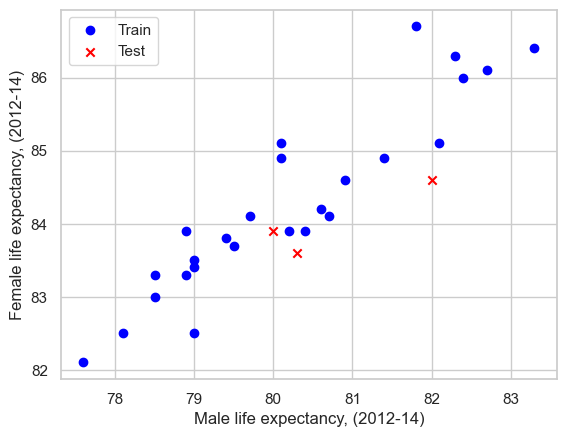

In [140]:
# For future purposes, we will reshape the data to be used in the regression model
x_reshaped = x.to_numpy().reshape(-1, 1)

# First splitting to create training and test sets
x_train, x_test, y_train, y_test = model_selection.train_test_split(x_reshaped, y, test_size=0.1)
# Further split training set to create validation set
x_train, x_val, y_train, y_val = model_selection.train_test_split(x_train, y_train, test_size=0.1)

# Reset index after splitting to ensure proper indexing
# x_train = x_train.reset_index(drop=True)
# y_train = y_train.reset_index(drop=True)

# Plot training data with blue color and circle marker
plt.scatter(x_train, y_train, color='blue', marker='o', label='Train')
# Plot test data with red color and x marker
plt.scatter(x_test, y_test, color='red', marker='x', label='Test')

plt.xlabel('Male life expectancy, (2012-14)')
plt.ylabel('Female life expectancy, (2012-14)')
plt.legend()
plt.show()

### Generate Synthetic Dataset

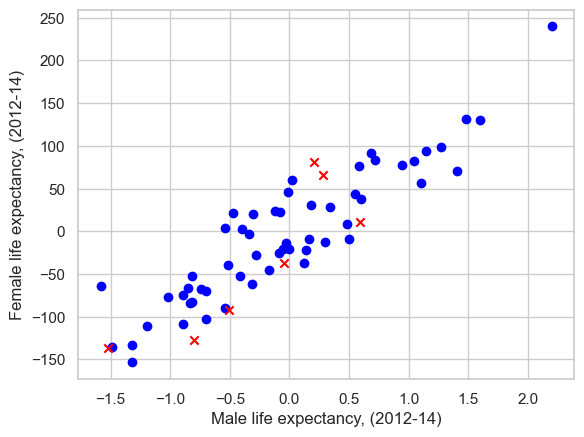

In [141]:
# 2x the size of the previous observation set
xs, ys, ps = datasets.make_regression(n_samples =70, n_features = 1, n_informative = 1, noise = 35, coef = True, random_state=112)
# First splitting to create training and test sets
xs_train, xs_test, ys_train, ys_test = model_selection.train_test_split(xs, ys, test_size=0.1)
# Further split training set to create validation set
xs_train, xs_val, ys_train, ys_val = model_selection.train_test_split(xs_train, ys_train, test_size=0.1)

# Reset index after splitting to ensure proper indexing
# xs_train = x_train.reset_index(drop=True)
# ys_train = y_train.reset_index(drop=True)

plt.scatter(xs_train, ys_train, color='blue', marker='o', label='Train')
plt.scatter(xs_test, ys_test, color='red', marker='x', label='Test')
plt.xlabel('Male life expectancy, (2012-14)')
plt.ylabel('Female life expectancy, (2012-14)')
plt.show()

### Linear Regression on Data (I): Gradient Descent

In [142]:
print('x_train: ', x_train.shape)
print('y_train: ', y_train.shape)
print('x_val: ', x_val.shape)
print('y_val: ', y_val.shape)
print('x_test: ', x_test.shape)
print('y_test: ', y_test.shape)

x_train:  (27, 1)
y_train:  (27,)
x_val:  (3, 1)
y_val:  (3,)
x_test:  (4, 1)
y_test:  (4,)


In [143]:
import math

In [144]:
from sklearn.impute import SimpleImputer

# Create an imputer object with a mean filling strategy
imputer = SimpleImputer(strategy='mean')

# Impute missing data in x_train, x_val, x_test
x_train = imputer.fit_transform(x_train)

x_val = imputer.transform(x_val)
x_test = imputer.transform(x_test)

# Impute missing data in y_train, y_val, y_test
# Note: Imputing target variable requires careful consideration and understanding of the data
y_train = imputer.fit_transform(y_train.values.reshape(-1, 1)).ravel()
y_val = imputer.transform(y_val.values.reshape(-1, 1)).ravel()
y_test = imputer.transform(y_test.values.reshape(-1, 1)).ravel()

In [145]:
print('x_train = \n', x_train)
print('y_train = \n', y_train)
print('x_val = \n', x_val)
print('y_val = \n', y_val)
print('x_test = \n', x_test)
print('y_test = \n', y_test)

x_train = 
 [[78.9       ]
 [78.5       ]
 [82.4       ]
 [78.1       ]
 [82.1       ]
 [78.9       ]
 [83.3       ]
 [82.7       ]
 [79.5       ]
 [81.4       ]
 [80.4       ]
 [81.8       ]
 [80.7       ]
 [80.19615385]
 [79.        ]
 [79.        ]
 [80.6       ]
 [80.2       ]
 [80.1       ]
 [79.        ]
 [77.6       ]
 [79.4       ]
 [80.1       ]
 [82.3       ]
 [78.5       ]
 [79.7       ]
 [80.9       ]]
y_train = 
 [83.9        83.         86.         82.5        85.1        83.3
 86.4        86.1        83.7        84.9        83.9        86.7
 84.1        84.28076923 83.4        83.5        84.2        83.9
 85.1        82.5        82.1        83.8        84.9        86.3
 83.3        84.1        84.6       ]
x_val = 
 [[80.4]
 [80.9]
 [80.4]]
y_val = 
 [84.4 83.4 84.2]
x_test = 
 [[80.19615385]
 [82.        ]
 [80.3       ]
 [80.        ]]
y_test = 
 [84.28076923 84.6        83.6        83.9       ]


We will:

1. Initialise the weights randomly.

2. Compute the gradient with respect to each weight.

3. Update the weights by subtracting a fraction of the gradient from them.

In [146]:
def initialize_and_predict(X, initial_weights=None):
    """
    Initializes weights if not provided and calculates predictions.

    Args:
    X (np.array): Feature matrix.
    initial_weights (np.array): Initial weights for the model.

    Returns:
    np.array: Predicted values.
    """
    if initial_weights is None:
        # Initialize weights to zeros or small random values
        initial_weights = np.zeros(X.shape[1])

    predictions = X.dot(initial_weights)
    return predictions, initial_weights

initial_predictions, initial_weights = initialize_and_predict(x_train)

# Compute Errors

In [147]:
#--
# compute_error()
# This function computes the sum of squared errors for the model.
# inputs:
#  M = number of instances
#  x = list of variable values for M instances
#  w = list of parameters values (of size 2)
#  y = list of target values
# output:
#  error (scalar)
#--
def compute_error( M, x, w, y ):
    error = 0
    y_hat = [0 for i in range( M )]
    for j in range( M ):
        y_hat[j] = w[0] + w[1] * x[j]
        error = error + math.pow(( y[j] - y_hat[j] ), 2 )
    error = error / M
    return( error )


#--
# compute_r2()
# This function computes R^2 for the model.
# inputs:
#  M = number of instances
#  x = list of variable values for M instances
#  w = list of parameters values (of size 2)
#  y = list of target values
# output:
#  r2 (scalar)
#--
def compute_r2( M, x, w, y ):
    u = 0
    v = 0
    y_hat = [0 for i in range( M )]
    y_mean = np.mean( y )
    for j in range( M ):
        y_hat[j] = w[0] + w[1] * x[j]
        u = u + math.pow(( y[j] - y_hat[j] ), 2 )
        v = v + math.pow(( y[j] - y_mean ), 2 )
    r2 = 1.0 - ( u / v )
    return( r2 )

# Run Gradient Descent and Build GIF

In [169]:
from sklearn.preprocessing import StandardScaler
from matplotlib.animation import FuncAnimation
import random

In [181]:
learning_rate = 0.08

MovieWriter imagemagick unavailable; using Pillow instead.


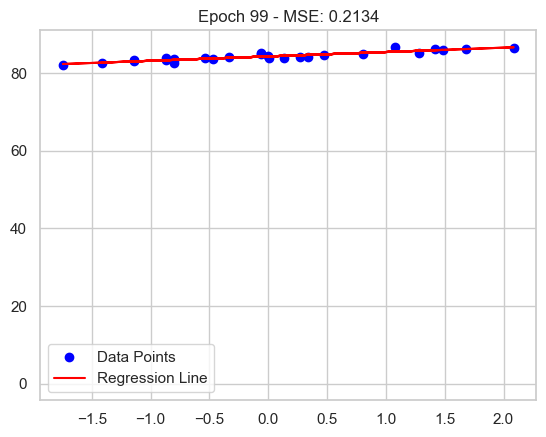

In [182]:
# Normalize the features
scaler = StandardScaler()
x_train_scaled = scaler.fit_transform(x_train.reshape(-1, 1)).flatten()
x_test_scaled = scaler.transform(x_test).flatten()

# Initialize weight and bias globally
w = random.random()
b = random.random()

# Set up the figure
fig, ax = plt.subplots()
ax.scatter(x_train_scaled, y_train, color='blue', label='Data Points')
line, = ax.plot(x_train_scaled, x_train_scaled * w + b, color='red', label='Regression Line')
plt.legend()

# Set initial y-axis limits
ax.set_ylim(min(y_train) - 1, max(y_train) + 1)

# Update function for animation
def update(epoch):
    global w, b # Need to modify global copy of w and b (weights and bias)

    # Predict the output using the current weights and bias and calculate the error
    y_pred = w * x_train_scaled + b
    error = y_train - y_pred
    mse = np.mean(error**2)

    # Calculate the gradients for weights and bias
    dw = -2 * np.dot(x_train_scaled.T, error) / len(x_train_scaled)
    db = -2 * np.sum(error) / len(x_train_scaled)

    # Update weights and bias
    w -= learning_rate * dw
    b -= learning_rate * db

        # Update the regression line
    line.set_ydata(y_pred)
    
    # Dynamically adjust the minimum y-value of the plot
    current_min_y = min(y_train.min(), y_pred.min()) - 1
    ax.set_ylim(current_min_y, ax.get_ylim()[1])

    # Update the plot
    # line.set_ydata(x_train_scaled * w + b)
    ax.set_title(f'Epoch {epoch} - MSE: {mse:.4f}')
    return line,

# Create animation
ani = FuncAnimation(fig, update, frames=np.arange(0, 100), interval=50)

# Save to GIF (this requires ffmpeg or imagemagick to be installed)
ani.save('linear_regression_1.gif', writer='imagemagick')

plt.show()

# Generate a Standard Score

<ins> Mean Squared Error </ins>

(An ideal score would be 0)

In [151]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# Calculate the final error and R-squared on the test set
y_pred_test = w * x_test_scaled + b
test_error = compute_error(len(y_test), x_test_scaled, [b, w], y_test)

sklearn_mse_test = mean_squared_error(y_test, y_pred_test)

def manual_mse(y_true, y_pred):
    return np.mean((y_true - y_pred) ** 2)

manual_mse_test = manual_mse(y_test, y_pred_test)
print(f'MSE (Test Set): {manual_mse_test}')

MSE (Test Set): 0.431777963292851


<ins> Sum of Squared Errors </ins>

(An ideal score would be 0)

(Same as MSE for one datapoint)

In [152]:
def manual_sse(y_true, y_pred):
    return np.sum((y_true - y_pred) ** 2)

manual_sse_test = manual_sse(y_test, y_pred_test)
print(f'MSE (Test Set): {manual_mse_test}')

MSE (Test Set): 0.431777963292851


<ins> Root Mean Squared Error </ins>

(An ideal score would be 0)

In [153]:
sklearn_rmse_test = np.sqrt(sklearn_mse_test)

def manual_rmse(y_true, y_pred):
    return np.sqrt(manual_mse(y_true, y_pred))

manual_rmse_test = manual_rmse(y_test, y_pred_test)
print(f'RMSE (Test Set): {manual_rmse_test}')

RMSE (Test Set): 0.6570981382509397


<ins> Mean of Absolute Differences </ins>

(An ideal score would be 0)

In [154]:
sklearn_mad_test = mean_absolute_error(y_test, y_pred_test)

def manual_mad(y_true, y_pred):
    return np.mean(np.abs(y_true - y_pred))

manual_mad_test = manual_mad(y_test, y_pred_test)
print(f'MAD (Test Set): {manual_mad_test}')

MAD (Test Set): 0.5096854273616458


<ins> R-Squared </ins>

(An ideal model would be 1)

In [162]:
sklearn_r2_test = r2_score(y_test, y_pred_test)

def manual_r2(y_true, y_pred):
    sst = np.sum((y_true - np.mean(y_true)) ** 2)
    ssr = np.sum((y_true - y_pred) ** 2)
    return 1 - (ssr/sst)

manual_r2_test = manual_r2(y_test, y_pred_test)
print(f'R-squared (Test Set): {manual_r2_test}')

R-squared (Test Set): -2.0163411103848285


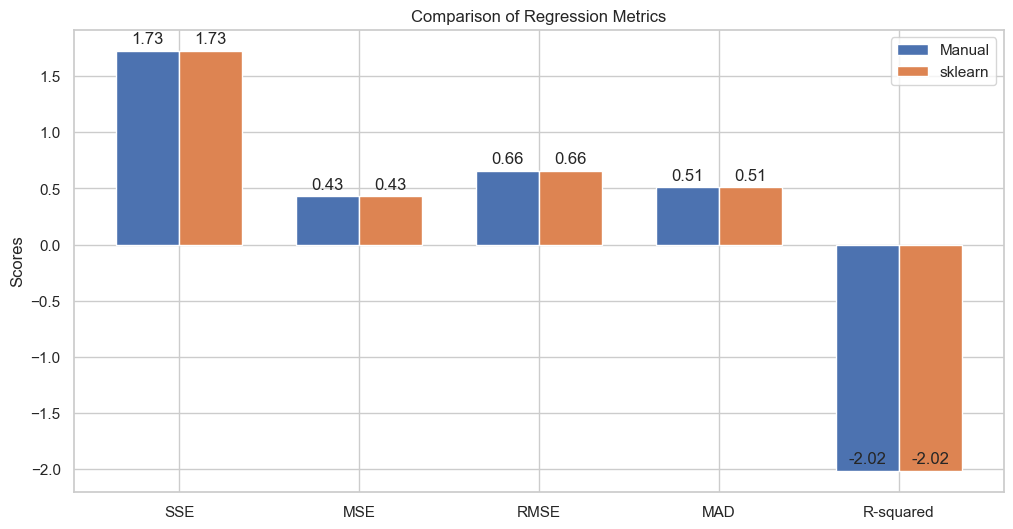

In [156]:
# Make predictions with the trained model
y_pred_train = w * x_train_scaled + b
y_pred_test = w * x_test_scaled + b


# Visualization
metrics = ['SSE', 'MSE', 'RMSE', 'MAD', 'R-squared']
manual_scores = [manual_sse_test, manual_mse_test, manual_rmse_test, manual_mad_test, manual_r2_test]
sklearn_scores = [manual_sse_test, sklearn_mse_test, sklearn_rmse_test, sklearn_mad_test, sklearn_r2_test]  # SSE is the same

x = np.arange(len(metrics))  # the label locations
width = 0.35  # the width of the bars

fig, ax = plt.subplots(figsize=(12, 6))
rects1 = ax.bar(x - width/2, manual_scores, width, label='Manual')
rects2 = ax.bar(x + width/2, sklearn_scores, width, label='sklearn')

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('Scores')
ax.set_title('Comparison of Regression Metrics')
ax.set_xticks(x)
ax.set_xticklabels(metrics)
ax.legend()

def autolabel(rects):
    """Attach a text label above each bar in *rects*, displaying its height."""
    for rect in rects:
        height = rect.get_height()
        ax.annotate(f'{height:.2f}',
                    xy=(rect.get_x() + rect.get_width() / 2, height),
                    xytext=(0, 3),  # 3 points vertical offset
                    textcoords="offset points",
                    ha='center', va='bottom')

autolabel(rects1)
autolabel(rects2)

plt.show()

In [157]:
mse_values = []
rmse_values = []
mad_values = []
r2_values = []

# Perform gradient descent and store metrics at each epoch
for epoch in range(1000):
    y_pred = w * x_train_scaled + b
    error = y_train - y_pred
    
    # Update weights based on gradient
    dw = -2 * np.dot(x_train_scaled.T, error) / len(x_train_scaled)
    db = -2 * np.sum(error) / len(x_train_scaled)
    w -= 0.01 * dw
    b -= 0.01 * db
    
    # Calculate and store metrics
    mse = mean_squared_error(y_train, y_pred)
    rmse = np.sqrt(mse)
    mad = mean_absolute_error(y_train, y_pred)
    r2 = r2_score(y_train, y_pred)
    mse_values.append(mse)
    rmse_values.append(rmse)
    mad_values.append(mad)
    r2_values.append(r2)

<ins> Plotting the Respective Errors </ins>

We are looking for convergence on zero from positive values for all but R^2.

The scientific notation equates to scale factor of graph. 

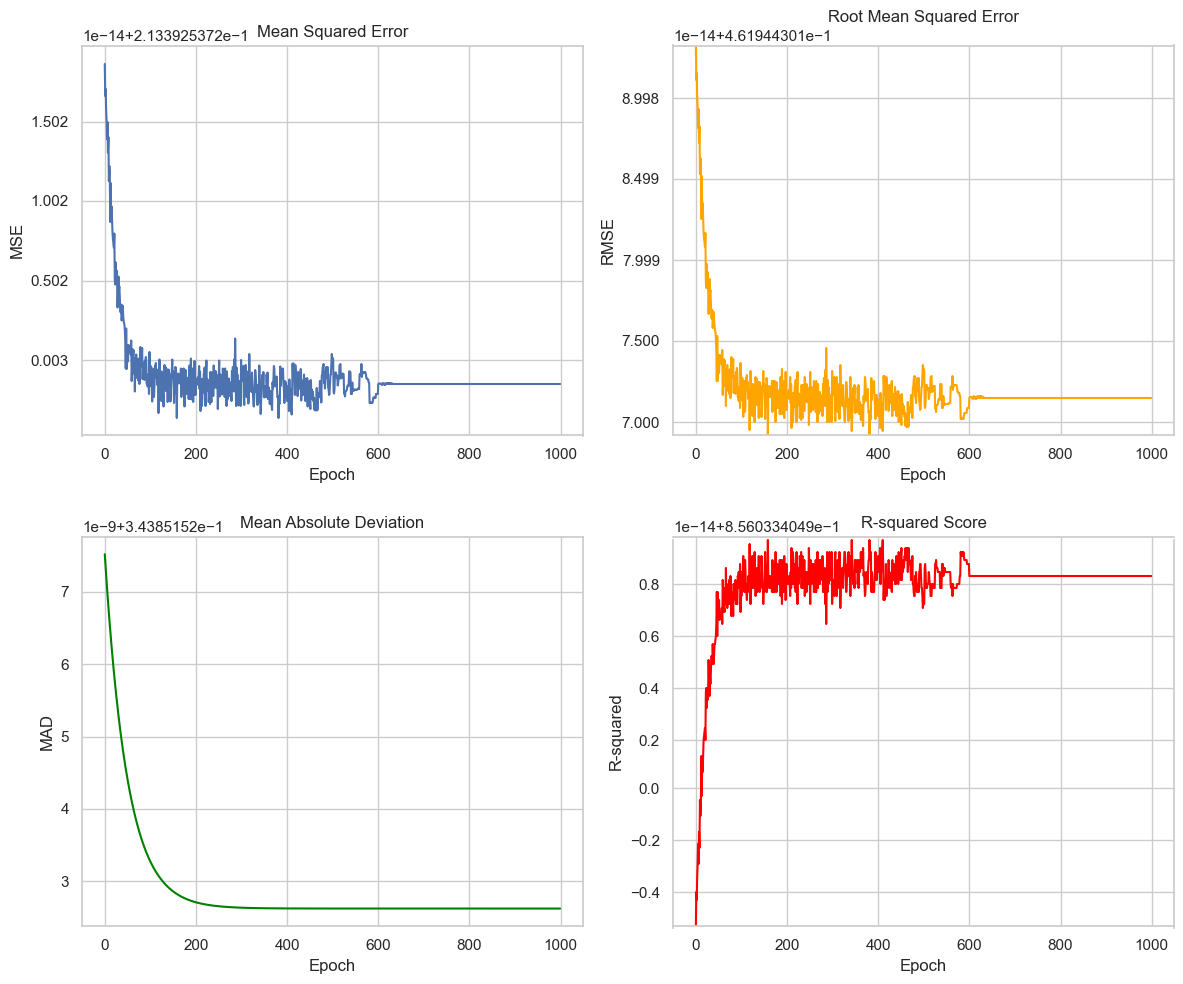

In [158]:
# Plot the error metrics with adjusted axes
fig, axes = plt.subplots(2, 2, figsize=(12, 10))

# For MSE
axes[0, 0].plot(mse_values, label='MSE')
axes[0, 0].set_title('Mean Squared Error')
axes[0, 0].set_xlabel('Epoch')
axes[0, 0].set_ylabel('MSE')
axes[0, 0].ticklabel_format(style='plain', axis='x')  # Disable scientific notation

# For RMSE
axes[0, 1].plot(rmse_values, label='RMSE', color='orange')
axes[0, 1].set_title('Root Mean Squared Error')
axes[0, 1].set_xlabel('Epoch')
axes[0, 1].set_ylabel('RMSE')
axes[0, 1].set_ylim([min(rmse_values), max(rmse_values)])  # Adjust y-axis range

# For MAD
axes[1, 0].plot(mad_values, label='MAD', color='green')
axes[1, 0].set_title('Mean Absolute Deviation')
axes[1, 0].set_xlabel('Epoch')
axes[1, 0].set_ylabel('MAD')
# axes[1, 0].set_ylim([min(mad_values), max(mad_values)])  # Adjust y-axis range

# For R-squared
axes[1, 1].plot(r2_values, label='R-squared', color='red')
axes[1, 1].set_title('R-squared Score')
axes[1, 1].set_xlabel('Epoch')
axes[1, 1].set_ylabel('R-squared')
axes[1, 1].set_ylim([min(r2_values), max(r2_values)])  # Adjust y-axis range

plt.tight_layout()
plt.show()

Convergence occurs around epoch 615. 

# 1. Fix the fact that the convergence suddenly stops.
# 2. Run for synthetic data: it should take 10k iterations apparently?
# 3. Show the convergence gif for a higher learning rate. Should converge within a few iterations.

MovieWriter imagemagick unavailable; using Pillow instead.


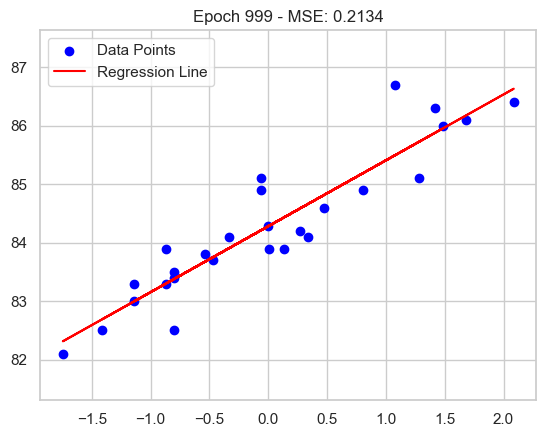

In [165]:
# import matplotlib.pyplot as plt
# import numpy as np
# from sklearn.preprocessing import StandardScaler
# from matplotlib.animation import FuncAnimation
# import random

# Assuming 'x_train' and 'y_train' are your features and targets

# Normalize the features
scaler = StandardScaler()
x_train_scaled = scaler.fit_transform(x_train.reshape(-1, 1)).flatten()

# Initialize weight and bias globally
w = random.random()
b = random.random()

# Set up the figure
fig, ax = plt.subplots()
ax.scatter(x_train_scaled, y_train, color='blue', label='Data Points')
line, = ax.plot(x_train_scaled, x_train_scaled * w + b, color='red', label='Regression Line')
plt.legend()

# Update function for animation
def update(epoch):
    global w, b  # Declare w and b as global to modify them inside this function

    y_pred = w * x_train_scaled + b
    error = y_train - y_pred
    
    mse = np.mean(error**2)

    dw = -2 * np.dot(x_train_scaled.T, error) / len(x_train_scaled)
    db = -2 * np.sum(error) / len(x_train_scaled)
    w -= 0.01 * dw
    b -= 0.01 * db

    line.set_ydata(y_pred)
    ax.set_ylim(np.min(y_pred) - 1, np.max(y_pred) + 1)  # Adjust y-limits
    ax.set_title(f'Epoch {epoch} - MSE: {mse:.4f}')
    return line,

# Create animation
ani = FuncAnimation(fig, update, frames=np.arange(0, 1000), interval=200)

# Save to GIF (this requires ffmpeg or imagemagick to be installed)
ani.save('linear_regression_2.gif', writer='imagemagick')

plt.show()

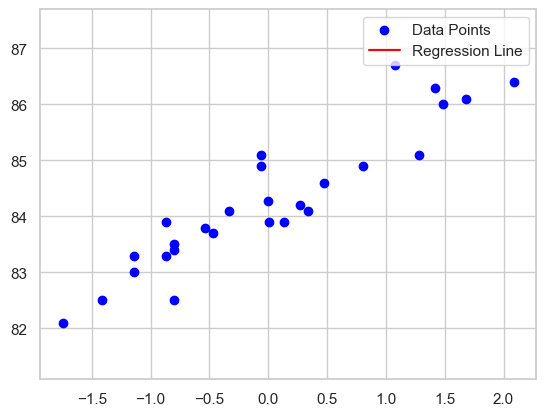

MovieWriter imagemagick unavailable; using Pillow instead.


In [168]:
# Normalize the features
scaler = StandardScaler()
x_train_scaled = scaler.fit_transform(x_train.reshape(-1, 1)).flatten()

# Initialize weight and bias globally
w = random.random()
b = random.random()

# Set up the figure
fig, ax = plt.subplots()
data_scatter = ax.scatter(x_train_scaled, y_train, color='blue', label='Data Points')
line, = ax.plot(x_train_scaled, x_train_scaled * w + b, color='red', label='Regression Line')
plt.legend()

# Set initial y-axis limits
ax.set_ylim(min(y_train) - 1, max(y_train) + 1)

# Update function for animation
def update(epoch):
    global w, b
    y_pred = w * x_train_scaled + b
    error = y_train - y_pred
    mse = np.mean(error**2)
    
    # Update weights
    dw = -2 * np.dot(x_train_scaled.T, error) / len(x_train_scaled)
    db = -2 * np.sum(error) / len(x_train_scaled)
    w -= 0.01 * dw
    b -= 0.01 * db
    
    # Update the regression line
    line.set_ydata(y_pred)
    
    # Dynamically adjust the minimum y-value of the plot
    current_min_y = min(y_train.min(), y_pred.min()) - 1
    ax.set_ylim(current_min_y, ax.get_ylim()[1])
    
    # Set the title to display the current epoch and MSE
    ax.set_title(f'Epoch {epoch} - MSE: {mse:.4f}')
    
    return line,

# Create animation
ani = FuncAnimation(fig, update, frames=np.arange(0, 1000), interval=50)

# Show the animation
plt.show()

# Save the animation
ani.save('linear_regression_3.gif', writer='imagemagick')


In [159]:

# %%
#--
# compute_error()
# This function computes the sum of squared errors for the model.
# inputs:
#  M = number of instances
#  x = list of variable values for M instances
#  w = list of parameters values (of size 2)
#  y = list of target values
# output:
#  error (scalar)
#--
def compute_error( M, x, w, y ):
    error = 0
    y_hat = [0 for i in range( M )]
    for j in range( M ):
        y_hat[j] = w[0] + w[1] * x[j]
        error = error + math.pow(( y[j] - y_hat[j] ), 2 )
    error = error / M
    return( error )


#--
# compute_r2()
# This function computes R^2 for the model.
# inputs:
#  M = number of instances
#  x = list of variable values for M instances
#  w = list of parameters values (of size 2)
#  y = list of target values
# output:
#  r2 (scalar)
#--
def compute_r2( M, x, w, y ):
    u = 0
    v = 0
    y_hat = [0 for i in range( M )]
    y_mean = np.mean( y )
    for j in range( M ):
        y_hat[j] = w[0] + w[1] * x[j]
        u = u + math.pow(( y[j] - y_hat[j] ), 2 )
        v = v + math.pow(( y[j] - y_mean ), 2 )
    r2 = 1.0 - ( u / v )
    return( r2 )

# %% [markdown]
# # Run Gradient Descent and Build GIF

# %%
from sklearn.preprocessing import StandardScaler
import random
import imageio

# %%
from matplotlib.animation import FuncAnimation

# %%
# Normalize the features
scaler = StandardScaler()
x_train_scaled = scaler.fit_transform(x_train.reshape(-1, 1)).flatten()
x_test_scaled = scaler.transform(x_test).flatten()

# Initialize weight and bias globally
w = random.random()
b = random.random()

# Set up the figure
fig, ax = plt.subplots()
ax.scatter(x_train_scaled, y_train, color='blue', label='Data Points')
line, = ax.plot(x_train_scaled, x_train_scaled * w + b, color='red', label='Regression Line')
plt.legend()

# Update function for animation
def update(epoch):
    global w, b  # Declare w and b as global to modify them inside this function
    y_pred = w * x_train_scaled + b
    error = y_train - y_pred
    mse = np.mean(error**2)
    dw = -2 * np.dot(x_train_scaled.T, error) / len(x_train_scaled)
    db = -2 * np.sum(error) / len(x_train_scaled)
    w -= 0.01 * dw
    b -= 0.01 * db
    line.set_ydata(x_train_scaled * w + b)
    ax.set_title(f'Epoch {epoch} - MSE: {mse:.4f}')
    return line,

# Create animation
ani = FuncAnimation(fig, update, frames=np.arange(0, 1000), interval=50)

# Save to GIF (this requires ffmpeg or imagemagick to be installed)
ani.save('linear_regression_1.gif', writer='imagemagick')

plt.show()

# %% [markdown]
# # Generate a Standard Score

# %% [markdown]
# <ins> Mean Squared Error </ins>
# 
# (An ideal score would be 0)

# %%
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# Calculate the final error and R-squared on the test set
y_pred_test = w * x_test_scaled + b
test_error = compute_error(len(y_test), x_test_scaled, [b, w], y_test)

sklearn_mse_test = mean_squared_error(y_test, y_pred_test)

def manual_mse(y_true, y_pred):
    return np.mean((y_true - y_pred) ** 2)

manual_mse_test = manual_mse(y_test, y_pred_test)
print(f'MSE (Test Set): {manual_mse_test}')

# %% [markdown]
# <ins> Sum of Squared Errors </ins>
# 
# (An ideal score would be 0)
# 
# (Same as MSE for one datapoint)

# %%
def manual_sse(y_true, y_pred):
    return np.sum((y_true - y_pred) ** 2)

manual_sse_test = manual_sse(y_test, y_pred_test)
print(f'MSE (Test Set): {manual_mse_test}')

# %% [markdown]
# <ins> Root Mean Squared Error </ins>
# 
# (An ideal score would be 0)

# %%
sklearn_rmse_test = np.sqrt(sklearn_mse_test)

def manual_rmse(y_true, y_pred):
    return np.sqrt(manual_mse(y_true, y_pred))

manual_rmse_test = manual_rmse(y_test, y_pred_test)
print(f'RMSE (Test Set): {manual_rmse_test}')

# %% [markdown]
# <ins> Mean of Absolute Differences </ins>
# 
# (An ideal score would be 0)

# %%
sklearn_mad_test = mean_absolute_error(y_test, y_pred_test)

def manual_mad(y_true, y_pred):
    return np.mean(np.abs(y_true - y_pred))

manual_mad_test = manual_mad(y_test, y_pred_test)
print(f'MAD (Test Set): {manual_mad_test}')

# %% [markdown]
# <ins> R-Squared </ins>
# 
# (An ideal model would be 1)

# %%
sklearn_r2_test = r2_score(y_test, y_pred_test)

def manual_r2(y_true, y_pred):
    sst = np.sum((y_true - np.mean(y_true)) ** 2)
    ssr = np.sum((y_true - y_pred) ** 2)
    return 1 - (ssr/sst)

manual_r2_test = manual_r2(y_test, y_pred_test)
print(f'R-squared (Test Set): {manual_r2_test}')

# %%
# Make predictions with the trained model
y_pred_train = w * x_train_scaled + b
y_pred_test = w * x_test_scaled + b


# Visualization
metrics = ['MSE', 'RMSE', 'MAD', 'R-squared', 'SSE']
manual_scores = [manual_mse_test, manual_rmse_test, manual_mad_test, manual_r2_test, manual_sse_test]
sklearn_scores = [sklearn_mse_test, sklearn_rmse_test, sklearn_mad_test, sklearn_r2_test, manual_sse_test]  # SSE is the same

x = np.arange(len(metrics))  # the label locations
width = 0.35  # the width of the bars

fig, ax = plt.subplots(figsize=(12, 6))
rects1 = ax.bar(x - width/2, manual_scores, width, label='Manual')
rects2 = ax.bar(x + width/2, sklearn_scores, width, label='sklearn')

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('Scores')
ax.set_title('Comparison of Regression Metrics')
ax.set_xticks(x)
ax.set_xticklabels(metrics)
ax.legend()

def autolabel(rects):
    """Attach a text label above each bar in *rects*, displaying its height."""
    for rect in rects:
        height = rect.get_height()
        ax.annotate(f'{height:.2f}',
                    xy=(rect.get_x() + rect.get_width() / 2, height),
                    xytext=(0, 3),  # 3 points vertical offset
                    textcoords="offset points",
                    ha='center', va='bottom')

autolabel(rects1)
autolabel(rects2)

plt.show()

ModuleNotFoundError: No module named 'imageio'

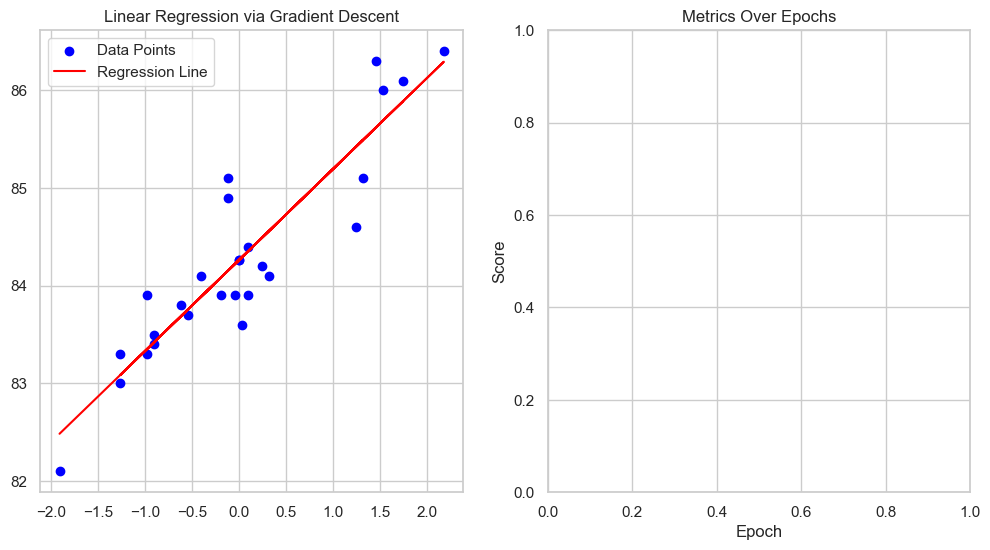

In [ ]:
# Initialize arrays to store metrics for each epoch
mse_values = []
rmse_values = []
mad_values = []
r2_values = []

# Set up two subplots: one for the regression line and one for the metrics
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 6))
ax1.scatter(x_train_scaled, y_train, color='blue', label='Data Points')
line, = ax1.plot(x_train_scaled, x_train_scaled * w + b, color='red', label='Regression Line')
ax1.legend()
ax1.set_title('Linear Regression via Gradient Descent')
ax2.set_title('Metrics Over Epochs')
ax2.set_xlabel('Epoch')
ax2.set_ylabel('Score')

# Update function for animation
def update_1(epoch):
    global w, b
    y_pred = w * x_train_scaled + b
    error = y_train - y_pred
    
    # Calculate metrics
    mse = mean_squared_error(y_train, y_pred)
    rmse = np.sqrt(mse)
    mad = mean_absolute_error(y_train, y_pred)
    r2 = r2_score(y_train, y_pred)

    # Append current metrics to their respective arrays
    mse_values.append(mse)
    rmse_values.append(rmse)
    mad_values.append(mad)
    r2_values.append(r2)

    # Update the regression line plot
    line.set_ydata(y_pred)
    ax1.set_title(f'Epoch {epoch} - MSE: {mse:.4f}')

    # Update the metrics plot
    ax2.clear()
    ax2.plot(mse_values, label='MSE')
    ax2.plot(rmse_values, label='RMSE')
    ax2.plot(mad_values, label='MAD')
    ax2.plot(r2_values, label='R-squared')
    ax2.legend()
    ax2.set_title('Metrics Over Epochs')
    ax2.set_xlabel('Epoch')
    ax2.set_ylabel('Score')

    return line, ax2

# Create animation
ani = FuncAnimation(fig, update_1, frames=np.arange(0, 1000), interval=50)

plt.show()

In [ ]:
# Normalize the training data
scaler = StandardScaler()
x_train = scaler.fit_transform(x_train)
x_test = scaler.transform(x_test)

# Gradient Descent Function with Mean Squared Error
def gradient_descent(X, y, lr=0.01, epochs=100):
    m = X.shape[0]  # number of samples
    w = random.random()  # initialize weight
    b = random.random()  # initialize bias
    mse_history = []  # to store the history of mean squared error
    
    for epoch in range(epochs):
        y_pred = w * X + b
        error = y - y_pred
        mse = np.mean(error**2)  # Mean Squared Error
        mse_history.append(mse)
        dw = -2 * np.dot(error, X) / m  # Derivative of the loss with respect to w
        db = -2 * np.sum(error) / m  # Derivative of the loss with respect to b
        w -= lr * dw
        b -= lr * db
        
        # Print the error every 10 epochs
        if epoch % 10 == 0:
            print(f'Epoch {epoch}: Mean Squared Error: {mse}')

            plt.scatter(X, y, color='blue', label='Data Points' if epoch == 0 else "")
            plt.plot(X, y_pred, color='red', label=f'Epoch {epoch}' if epoch == 0 else "")
            plt.xlabel('Male life expectancy, (2012-14)')
            plt.ylabel('Female life expectancy, (2012-14)')
            if epoch == 0:
                plt.legend()
            plt.title(f'Linear Regression via Gradient Descent at Epoch {epoch}')
            plt.pause(0.05)  # pause to allow for the plot to be updated
            
        plt.show()
        
        # Optional: Add an early stopping condition if the error increases

    return w, b, mse_history

# Run Gradient Descent
w, b, mse_history = gradient_descent(x_train.flatten(), y_train, lr=0.01, epochs=1000)

# Plot the MSE history to see the trend
plt.plot(mse_history)
plt.xlabel('Epoch')
plt.ylabel('Mean Squared Error')
plt.title('MSE Trend Over Epochs')
plt.show()

# Display the final parameters and error
print(f'Final weight: {w}, Final bias: {b}, Final Mean Squared Error: {mse_history[-1]}')

In [ ]:
def gradient_descent(X, y, lr=0.01, epochs=100):
    m = len(X)  # number of samples
    w = random.random()  # initialize weight
    b = random.random()  # initialize bias
    mse_history = []  # to store the history of mean squared error
    
    for epoch in range(epochs):
        y_pred = w * X + b
        error = y - y_pred
        mse = np.mean(error**2)
        mse_history.append(mse)
        
        # Update weights
        dw = -2 * np.dot(X.T, error) / m
        db = -2 * np.sum(error) / m
        w -= lr * dw
        b -= lr * db
        
        # Plot the regression line at specified intervals or the last one
        if epoch % 10 == 0 or epoch == epochs - 1:
            plt.scatter(X, y, color='blue', label='Data Points' if epoch == 0 else "")
            plt.plot(X, y_pred, color='red', label=f'Epoch {epoch}' if epoch == 0 else "")
            plt.xlabel('Male life expectancy, (2012-14)')
            plt.ylabel('Female life expectancy, (2012-14)')
            if epoch == 0:
                plt.legend()
            plt.title(f'Linear Regression via Gradient Descent at Epoch {epoch}')
            plt.pause(0.05)  # pause to allow for the plot to be updated
            
    plt.show()
    
    return w, b, mse_history

# Normalize the features
scaler = StandardScaler()
x_train_scaled = scaler.fit_transform(x_train.reshape(-1, 1)).flatten()

# Run Gradient Descent and visualize
w, b, mse_history = gradient_descent(x_train_scaled, y_train, lr=0.01, epochs=100)

# Plot the MSE history to see the trend over epochs
plt.figure(figsize=(10, 5))
plt.plot(mse_history)
plt.xlabel('Epoch')
plt.ylabel('Mean Squared Error')
plt.title('MSE Trend Over Epochs')
plt.show()

# Display the final learned parameters and MSE
print(f'Final weight: {w}, Final bias: {b}, Final Mean Squared Error: {mse_history[-1]}')

In [ ]:
#--
# gradient_descent_2()
# this function solves linear regression with gradient descent for 2
# parameters.
# inputs:
#  M = number of instances
#  x = list of variable values for M instances
#  w = list of parameter values (of size 2)
#  y = list of target values
#  alpha = learning rate
# output:
#  w = updated list of parameter values
#---
def gradient_descent_2( M, x, w, y, alpha ):
    for j in range( M ):
        # compute prediction for this instance
        y_hat = w[0] + w[1] * x[j]
        # compute prediction error for this instance
        error = y[j] - y_hat
        # adjust by partial error (for this instance)
        w[0] = w[0] + alpha * error * 1    * ( 1.0 / M )
        w[1] = w[1] + alpha * error * x[j] * ( 1.0 / M )
    return w

In [ ]:
def compute_cost(X, y, weights):
    n = len(y)
    predictions = X.dot(weights)
    cost = (1/n) * np.sum((y - predictions)**2)
    return cost

Iteration 1: Cost = 207241.94151925988, Weights = [6.73453291]


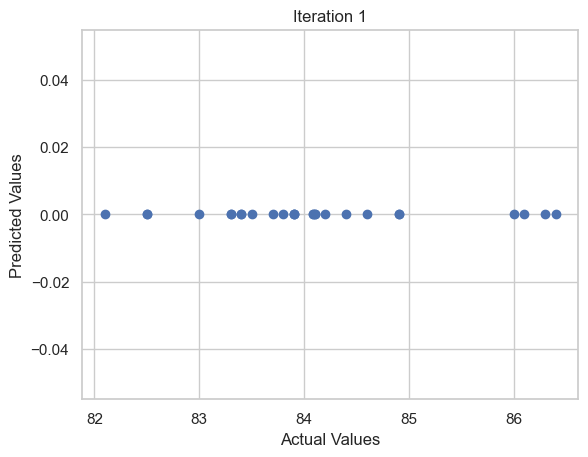

Iteration 50: Cost = 1.5754185340659257e+77, Weights = [-4.95621528e+36]


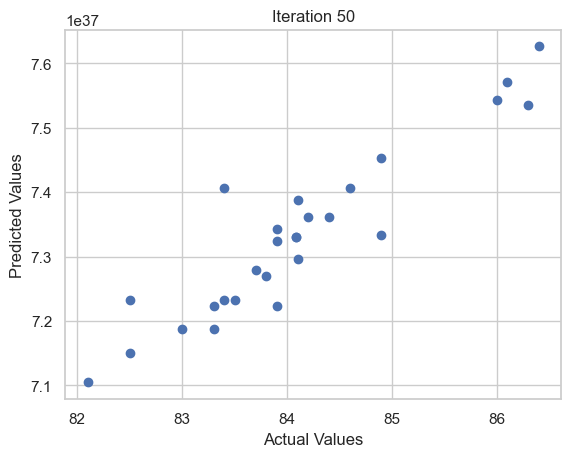

Iteration 100: Cost = 3.5097207875678156e+150, Weights = [-2.33931373e+73]


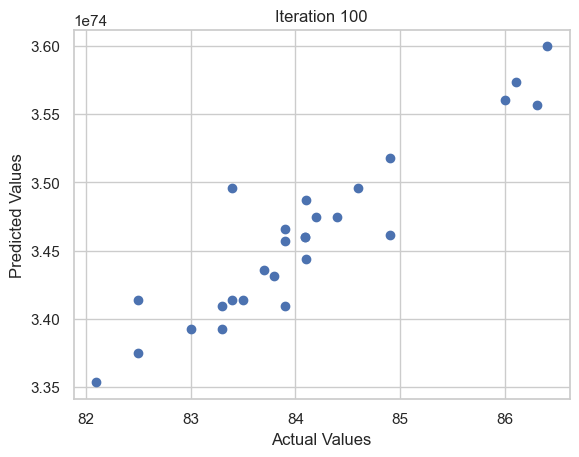

Iteration 150: Cost = 7.818963494668453e+223, Weights = [-1.1041467e+110]


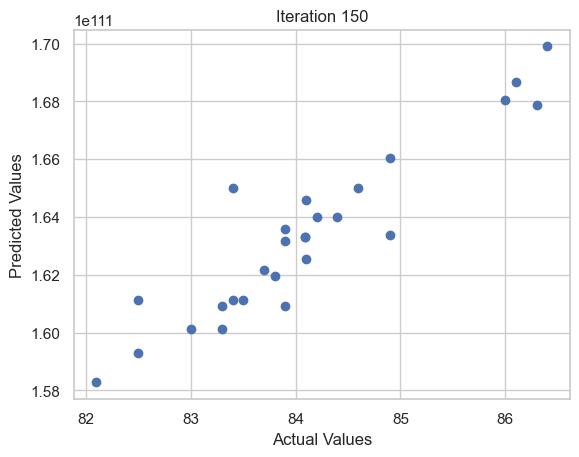

Iteration 200: Cost = 1.741910363568396e+297, Weights = [-5.21152815e+146]


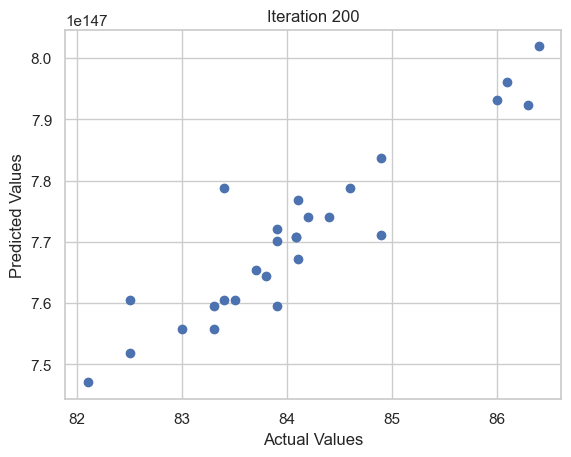

Iteration 250: Cost = inf, Weights = [-2.45982039e+183]


/var/folders/xt/9yhd6vfj2xx9mbwp1xq8_y3h0000gn/T/ipykernel_4366/3223032585.py:4: RuntimeWarning: overflow encountered in square
  cost = (1/n) * np.sum((y - predictions)**2)


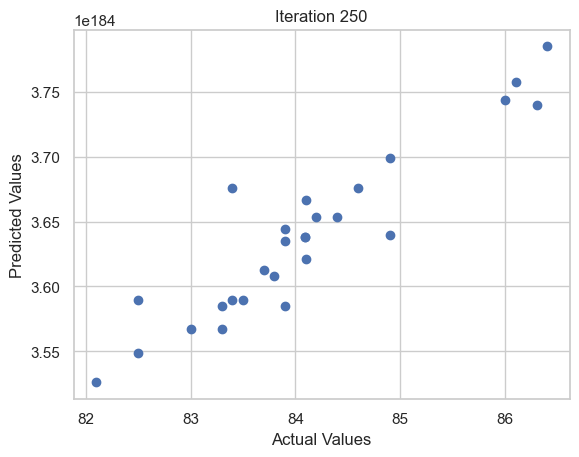

In [ ]:
def gradient_descent(X, y, learning_rate=0.001, iterations=1000):
    """
    Performs gradient descent to fit a linear model.

    Args:
    X (np.array): Feature matrix.
    y (np.array): Target values.
    learning_rate (float): Learning rate for gradient descent.
    iterations (int): Number of iterations for gradient descent.

    Returns:
    np.array: Final weights after gradient descent.
    """
    predictions, weights = initialize_and_predict(X)
    n = len(y)
    cost_history = np.zeros(iterations)

    for it in range(1, iterations + 1):  # Start iterations from 1
        prediction = np.dot(X, weights)
        weights = weights - (1/n) * learning_rate * (X.T.dot((prediction - y)))
        cost = compute_cost(X, y, weights)
        cost_history[it - 1] = cost

        # Debug information
        if it % 50 == 0 or it == 1:
            print(f"Iteration {it}: Cost = {cost}, Weights = {weights}")
            plt.figure()
            plt.scatter(y, prediction)
            plt.xlabel('Actual Values')
            plt.ylabel('Predicted Values')
            plt.title(f'Iteration {it}')
            plt.show()

    return weights, cost_history

# Example usage
final_weights, cost_history = gradient_descent(x_train, y_train, learning_rate=0.001, iterations=250)

In [ ]:
def compute_r_squared(y, predictions):
    residual_sum_of_squares = np.sum((y - predictions) ** 2)
    total_sum_of_squares = np.sum((y - np.mean(y)) ** 2)
    r_squared = 1 - (residual_sum_of_squares / total_sum_of_squares)
    return r_squared

def gradient_descent(X, y, learning_rate=0.001, iterations=100):
    weights = np.zeros(X.shape[1])
    cost_history = []
    r_squared_history = []

    for it in range(1, iterations + 1):
        predictions = X.dot(weights)
        errors = predictions - y
        gradient = 2 * X.T.dot(errors) / len(y)
        weights -= learning_rate * gradient

        # Compute cost for plotting
        cost = compute_cost(X, y, weights)
        cost_history.append(cost)
        
        # Compute R-squared for debugging
        r_squared = compute_r_squared(y, predictions)
        r_squared_history.append(r_squared)

        # Plot periodically
        if it % 10 == 0 or it == 1:
            plt.scatter(X, y, color='blue')  # assuming X is the single feature
            plt.plot(X, predictions, color='red')
            plt.title(f'Iteration {it} - Cost: {cost:.4f}, $R^2$: {r_squared:.4f}')
            plt.xlabel('Male life expectancy, (2012-14)')
            plt.ylabel('Female life expectancy, (2012-14)')
            plt.show()

    return weights, cost_history, r_squared_history

# Usage
# Assuming x_train and y_train are already prepared and reshaped correctly
final_weights, cost_history, r_squared_history = gradient_descent(x_train, y_train, learning_rate=0.001, iterations=100)

Exception: Dot product shape mismatch, (34,) vs (1,)